In [3]:
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
#matplotlib.rc('font', family='AppleGothic')  # MacOS
matplotlib.rc('font', family='Malgun Gothic')  # Windows
plt.rcParams['axes.unicode_minus'] = False

In [6]:
#데이터 불러오기
input_fd = open('C:/Temp/KRvideos.csv',errors = 'backslashreplace',encoding='utf-8')
KRvideos = pd.read_csv(input_fd)

input_fd = open('C:/Temp/JPvideos.csv', errors = 'backslashreplace',encoding='utf-8')
JPvideos = pd.read_csv(input_fd)

In [11]:
KRvideos.shape

(34567, 16)

In [12]:
JPvideos.shape

(20523, 16)

In [13]:
KRvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [14]:
import json

In [15]:
pd.read_json('C:/Temp/KR_category_id.json')

id_to_category = {}

with open('C:/Temp/KR_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[category['id']] = category['snippet']['title']

        
id_to_category

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [16]:
id_to_category=pd.DataFrame(data ={'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'},index=['category'])

In [17]:
id_to_category=np.transpose(id_to_category)
id_to_category

,category
1,Film & Animation
2,Autos & Vehicles
10,Music
15,Pets & Animals
17,Sports
18,Short Movies
19,Travel & Events
20,Gaming
21,Videoblogging
22,People & Blogs


In [19]:
id_to_category['index'] = id_to_category.index

In [21]:
id_to_category['index']=id_to_category['index'].astype(int)
KRvideos['category_id']=KRvideos['category_id'].astype(int)

In [22]:
KRvideos=KRvideos.merge(id_to_category ,left_on ='category_id',right_on='index')

In [26]:
KRvideos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34279 entries, 0 to 34278
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34279 non-null  object
 1   trending_date           34279 non-null  object
 2   title                   34279 non-null  object
 3   channel_title           34279 non-null  object
 4   category_id             34279 non-null  int32 
 5   publish_time            34279 non-null  object
 6   tags                    34279 non-null  object
 7   views                   34279 non-null  int64 
 8   likes                   34279 non-null  int64 
 9   dislikes                34279 non-null  int64 
 10  comment_count           34279 non-null  int64 
 11  thumbnail_link          34279 non-null  object
 12  comments_disabled       34279 non-null  bool  
 13  ratings_disabled        34279 non-null  bool  
 14  video_error_or_removed  34279 non-null  bool  
 15  de

In [24]:
KRvideos["description"] = KRvideos["description"].fillna(value="")

In [25]:
KRvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,index
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,People & Blogs,22
1,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요,People & Blogs,22
2,4Nxb_nQDYWo,17.14.11,예능신 이광수 하이라이트 모음,채린이의 즐거운 유튜브,22,2017-11-12T03:30:47.000Z,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",114858,252,40,36,https://i.ytimg.com/vi/4Nxb_nQDYWo/default.jpg,False,False,False,매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,People & Blogs,22
3,cplEUy1zk80,17.14.11,[일본반응] 한국이 인도-태평양 안보라인에 참가를 거절 !!! 난리가 난 일본,보고 싶었던 해외반응 이슈,22,2017-11-12T11:40:23.000Z,"일본|""한국""|""안보라인""|""인도 태평양""|""인도""|""태평양""|""미국""|""중국""|""동맹""",70166,301,37,352,https://i.ytimg.com/vi/cplEUy1zk80/default.jpg,False,False,False,Kevin MacLeod의 At Launch은(는) Creative Commons ...,People & Blogs,22
4,iToRdbxuMtg,17.14.11,현재 논란중인 홍대 머리채남,궁금타파,22,2017-11-12T18:52:16.000Z,"홍대|""홍대 버스킹""",65547,91,207,154,https://i.ytimg.com/vi/iToRdbxuMtg/default.jpg,False,False,False,홍대 댄스 버스킹하는데 갑자기 여성분 머리 잡고 나옴...,People & Blogs,22


유튜브는 채널 관리자가 자신의 비디오에 댓글을 달지 못하게 막을 수 있다. 주로 악플이 많이 달린 경우, 비디오에 댓글을 달지 못하게 설정이 되어 있는 것을 볼 수 있다. 따라서 영상의 'comments disabled' 기능이 켜진 경우(=댓글을 달지 못하게 설정된 경우) 싫어요 수가 많을 것이라고 생각했고, 실제로도 그러한지 분석하고자 한다.

In [29]:
comments_dis_KRvideos = KRvideos[KRvideos['comments_disabled']==True]

In [30]:
comments_dis_KRvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,index
24,JH9V6cVcN-4,17.14.11,[주식투자]최승욱의 상위1% 진짜주식(2017년 11월 13일 월요일),최승욱의 진짜주식,22,2017-11-13T08:06:44.000Z,"최승욱|""진짜주식""|""주식""|""증권""|""매매""|""트레이딩""|""경제""|""한국경제""|""...",8129,200,12,0,https://i.ytimg.com/vi/JH9V6cVcN-4/default.jpg,True,False,False,당일 핵심 주도주를 집중 분석합니다!! \n동영상이 마음에 들면 구독하기 눌러주세요...,People & Blogs,22
196,LC3h3fowqkg,17.18.11,슈퍼 뿅뿅 신은 사토시 + 아이돌의 정석 카즈,DROP sub,22,2017-11-17T07:37:25.000Z,[none],10112,0,0,0,https://i.ytimg.com/vi/LC3h3fowqkg/default.jpg,True,True,False,Do not re-edit\nDo not re-upload,People & Blogs,22
243,LC3h3fowqkg,17.19.11,슈퍼 뿅뿅 신은 사토시 + 아이돌의 정석 카즈,DROP sub,22,2017-11-17T07:37:25.000Z,[none],13300,0,0,0,https://i.ytimg.com/vi/LC3h3fowqkg/default.jpg,True,True,False,Do not re-edit\nDo not re-upload,People & Blogs,22
399,cTD6giRjDE8,17.23.11,방탄AMA출연이 일본방송에서 소개!! BTS AMA,RunRun,22,2017-11-21T00:46:13.000Z,"방탄AMA|""BTS AMA""|""BTS""|""バンタン""",175893,0,0,0,https://i.ytimg.com/vi/cTD6giRjDE8/default.jpg,True,True,False,,People & Blogs,22
526,gUY7rlruQJU,17.26.11,아라시가 좋아하는 빵은?,DROP,22,2017-11-24T16:18:14.000Z,[none],18177,0,0,0,https://i.ytimg.com/vi/gUY7rlruQJU/default.jpg,True,True,False,Do not re-edit\nDo not re-upload,People & Blogs,22


In [31]:
comments_abl_KRvideos = KRvideos[KRvideos['comments_disabled']==False]
comments_abl_KRvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,index
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....,People & Blogs,22
1,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요,People & Blogs,22
2,4Nxb_nQDYWo,17.14.11,예능신 이광수 하이라이트 모음,채린이의 즐거운 유튜브,22,2017-11-12T03:30:47.000Z,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",114858,252,40,36,https://i.ytimg.com/vi/4Nxb_nQDYWo/default.jpg,False,False,False,매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^,People & Blogs,22
3,cplEUy1zk80,17.14.11,[일본반응] 한국이 인도-태평양 안보라인에 참가를 거절 !!! 난리가 난 일본,보고 싶었던 해외반응 이슈,22,2017-11-12T11:40:23.000Z,"일본|""한국""|""안보라인""|""인도 태평양""|""인도""|""태평양""|""미국""|""중국""|""동맹""",70166,301,37,352,https://i.ytimg.com/vi/cplEUy1zk80/default.jpg,False,False,False,Kevin MacLeod의 At Launch은(는) Creative Commons ...,People & Blogs,22
4,iToRdbxuMtg,17.14.11,현재 논란중인 홍대 머리채남,궁금타파,22,2017-11-12T18:52:16.000Z,"홍대|""홍대 버스킹""",65547,91,207,154,https://i.ytimg.com/vi/iToRdbxuMtg/default.jpg,False,False,False,홍대 댄스 버스킹하는데 갑자기 여성분 머리 잡고 나옴...,People & Blogs,22


Text(0, 0.5, 'dislikes')

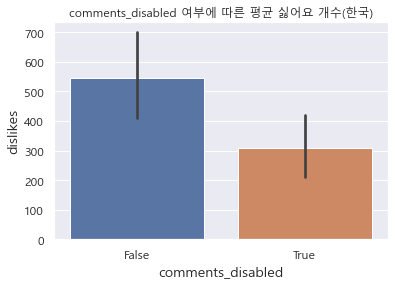

In [47]:
ax = plt.subplots() 
ax = sn.barplot(x='comments_disabled', y='dislikes', data=KRvideos) 
ax.set_title('comments_disabled 여부에 따른 평균 싫어요 개수(한국)') 
ax.set_xlabel('comments_disabled') 
ax.set_ylabel('dislikes')

In [38]:
comments_dis_KRvideos.shape

(509, 18)

In [39]:
comments_abl_KRvideos.shape

(33770, 18)

Text(0, 0.5, 'dislikes')

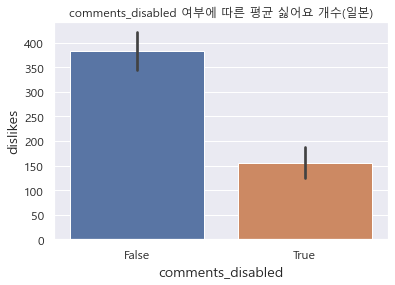

In [48]:
ax = plt.subplots() 
ax = sn.barplot(x='comments_disabled', y='dislikes', data=JPvideos) 
ax.set_title('comments_disabled 여부에 따른 평균 싫어요 개수(일본)') 
ax.set_xlabel('comments_disabled') 
ax.set_ylabel('dislikes')

'comments_disabled 된 영상은 그렇지 않은 영상보다 싫어요를 많이 받을 것이다'라는 가설이 틀렸음을 알 수 있다.

Text(0, 0.5, 'likes')

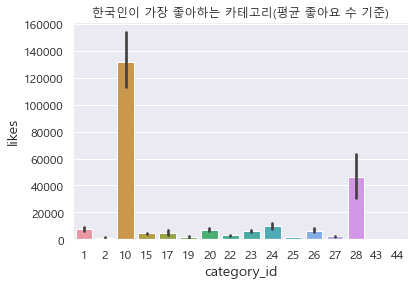

In [42]:
ax = plt.subplots() 
ax = sn.barplot(x='category_id', y='likes', data=KRvideos) 
ax.set_title('한국인이 가장 좋아하는 카테고리(평균 좋아요 수 기준)') 
ax.set_xlabel('category_id') 
ax.set_ylabel('likes')

Music(음악)이 2위인 'Science & Technology'(과학기술) 와 약 3배에 달하는 큰 차이로 1위. 그 외 카테고리는 비슷비슷.

Text(0, 0.5, 'views')

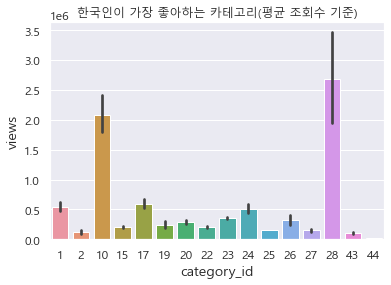

In [43]:
ax = plt.subplots() 
ax = sn.barplot(x='category_id', y='views', data=KRvideos) 
ax.set_title('한국인이 가장 좋아하는 카테고리(평균 조회수 기준)') 
ax.set_xlabel('category_id') 
ax.set_ylabel('views')

좋아요 기준으로 봤을 때와 달리 'Science & Technology'(과학기술)이 1위, Music(음악)이 2위. 그 외 Film & Animation, Sports, Entertainment가 각각 평균적으로 50만 뷰 기록. 그 외 카테고리는 비슷비슷.

Text(0, 0.5, 'likes')

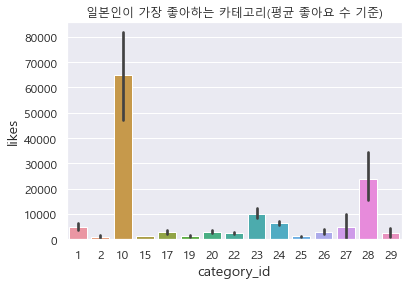

In [44]:
ax = plt.subplots() 
ax = sn.barplot(x='category_id', y='likes', data=JPvideos) 
ax.set_title('일본인이 가장 좋아하는 카테고리(평균 좋아요 수 기준)') 
ax.set_xlabel('category_id') 
ax.set_ylabel('likes')

Text(0, 0.5, 'views')

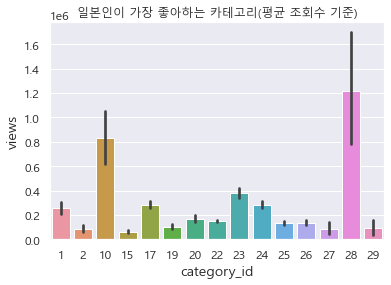

In [45]:
ax = plt.subplots() 
ax = sn.barplot(x='category_id', y='views', data=JPvideos) 
ax.set_title('일본인이 가장 좋아하는 카테고리(평균 조회수 기준)') 
ax.set_xlabel('category_id') 
ax.set_ylabel('views')